In [63]:
import ase

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as df

import seaborn as sns
%matplotlib inline


import csv

address = 'C:.../structures.csv'
structure=pd.read_csv(address)

df = pd.read_csv('C:.../structures.csv')

In [65]:
print(df.shape)

(2358875, 6)


In [66]:
df.columns

Index(['molecule_name', 'atom_index', 'atom', 'x', 'y', 'z'], dtype='object')

In [67]:
df.isnull().sum().sum()

0

In [68]:
df.head(800)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397
...,...,...,...,...,...,...
795,dsgdb9nsd_000086,14,H,0.361533,-1.671537,1.471719
796,dsgdb9nsd_000087,0,C,-0.039703,1.509550,-0.041122
797,dsgdb9nsd_000087,1,C,-0.030236,-0.003353,-0.064984
798,dsgdb9nsd_000087,2,C,-1.246132,-0.683566,0.525312


In [69]:
df.corr()

,atom_index,x,y,z
atom_index,1.000000,0.007510,-0.193897,0.041608
x,0.007510,1.000000,0.154734,0.011186
y,-0.193897,0.154734,1.000000,0.020212
z,0.041608,0.011186,0.020212,1.000000


In [70]:
def plot_corr(df, size=1000):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

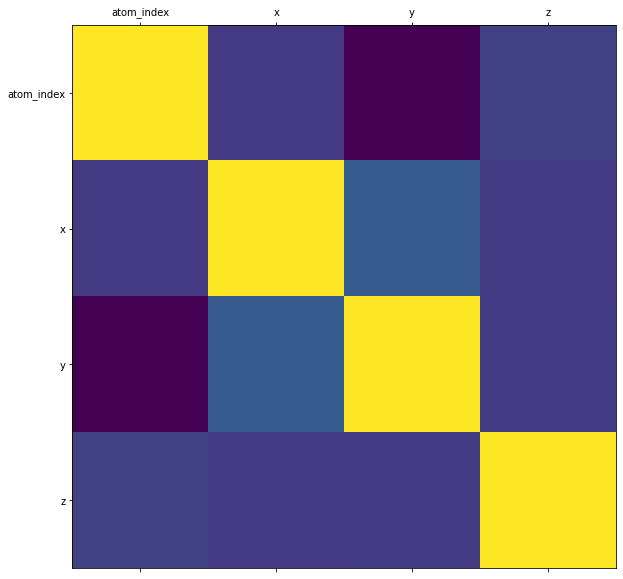

In [71]:
plot_corr(df)

In [72]:
import random

# Select a molecule
random_molecule = random.choice(structure["molecule_name"].unique())
molecule = structure[structure['molecule_name'] == random_molecule]
display(molecule)


,molecule_name,atom_index,atom,x,y,z
1845079,dsgdb9nsd_105174,0,C,0.030127,1.568550,-0.057191
1845080,dsgdb9nsd_105174,1,C,0.009210,0.114543,-0.103503
1845081,dsgdb9nsd_105174,2,C,-0.002975,-1.089673,-0.128946
1845082,dsgdb9nsd_105174,3,C,0.020731,-2.528388,-0.213329
1845083,dsgdb9nsd_105174,4,C,1.204131,-3.136521,-0.951657
1845084,dsgdb9nsd_105174,5,O,2.411722,-2.931481,-0.249519
1845085,dsgdb9nsd_105174,6,O,-0.268752,-3.245590,1.018150
1845086,dsgdb9nsd_105174,7,C,-1.218765,-3.324824,-0.046529
1845087,dsgdb9nsd_105174,8,C,-2.571808,-2.710542,0.190585
1845088,dsgdb9nsd_105174,9,H,1.030838,1.955865,-0.276903


In [73]:
# Get atomic coordinates
atoms = molecule.iloc[:, 3:].values
print(atoms)

[[ 3.01267823e-02  1.56854997e+00 -5.71905269e-02]
 [ 9.21042990e-03  1.14543230e-01 -1.03502504e-01]
 [-2.97520690e-03 -1.08967309e+00 -1.28945609e-01]
 [ 2.07312074e-02 -2.52838790e+00 -2.13328847e-01]
 [ 1.20413128e+00 -3.13652051e+00 -9.51657094e-01]
 [ 2.41172160e+00 -2.93148082e+00 -2.49519482e-01]
 [-2.68751775e-01 -3.24559023e+00  1.01814984e+00]
 [-1.21876457e+00 -3.32482361e+00 -4.65289001e-02]
 [-2.57180812e+00 -2.71054240e+00  1.90585463e-01]
 [ 1.03083808e+00  1.95586491e+00 -2.76902827e-01]
 [-6.63532677e-01  2.00136095e+00 -7.86435738e-01]
 [-2.58495537e-01  1.93459833e+00  9.34144151e-01]
 [ 1.00347344e+00 -4.20725902e+00 -1.10934257e+00]
 [ 1.32460504e+00 -2.66110661e+00 -1.92979628e+00]
 [ 2.27267924e+00 -3.27527603e+00  6.40828748e-01]
 [-1.23268771e+00 -4.29701660e+00 -5.44632075e-01]
 [-2.47580709e+00 -1.71033683e+00  6.16899369e-01]
 [-3.12550456e+00 -2.64117243e+00 -7.51792915e-01]
 [-3.15287341e+00 -3.33370642e+00  8.78048419e-01]]


In [74]:
symbols = molecule.iloc[:, 2].values
print(symbols)

['C' 'C' 'C' 'C' 'C' 'O' 'O' 'C' 'C' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H']


In [77]:
from ase import Atoms
import ase.visualize

system = Atoms(positions=atoms, symbols=symbols)

ase.visualize.view(system, viewer="x3d")

In [78]:
def view(molecule):
    # Select a molecule
    mol = df[df['molecule_name'] == molecule]
    
    # Get atomic coordinates
    xcart = mol.iloc[:, 3:].values
    
    # Get atomic symbols
    symbols = mol.iloc[:, 2].values
    
    # Display molecule
    system = Atoms(positions=xcart, symbols=symbols)
    print('Molecule Name: %s.' %molecule)
    return ase.visualize.view(system, viewer="x3d")

random_molecule = random.choice(df['molecule_name'].unique())
view(random_molecule)

Molecule Name: dsgdb9nsd_123243.
